In [55]:
import yfinance as yf
import pandas as pd
import os

In [56]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500.to_csv("sp500.csv")
ftse100 = yf.Ticker("^FTSE")
ftse100 = ftse100.history(period="max")
ftse100.to_csv("ftse100.csv")

In [57]:
# sp500.index = pd.to_datetime(sp500.index)

sp500["Date"] = pd.to_datetime(sp500.index, errors='coerce')
sp500["DOW"] = sp500["Date"].dt.dayofweek
sp500["MOY"] = sp500["Date"].dt.month


In [58]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,DOW,MOY
Date,,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0,1927-12-30 00:00:00-05:00,4,12
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,0,1928-01-03 00:00:00-05:00,1,1
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,0,1928-01-04 00:00:00-05:00,2,1
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0,0,1928-01-05 00:00:00-05:00,3,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0,1928-01-06 00:00:00-05:00,4,1
...,...,...,...,...,...,...,...,...,...,...
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,0,0,2023-12-20 00:00:00-05:00,2,12
2023-12-21 00:00:00-05:00,4724.290039,4748.709961,4708.350098,4746.750000,3431180000,0,0,2023-12-21 00:00:00-05:00,3,12
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0,0,2023-12-22 00:00:00-05:00,4,12


<AxesSubplot: xlabel='Date'>

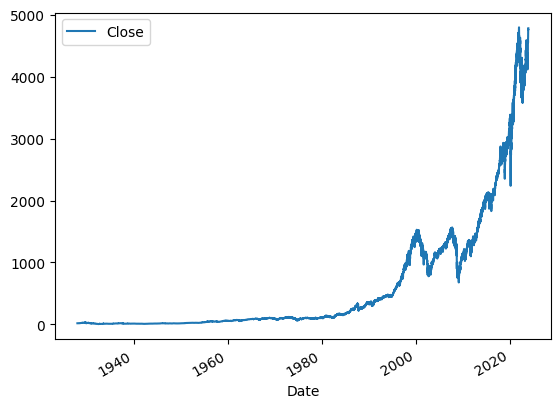

In [59]:
sp500.plot.line(y="Close", use_index=True)

In [60]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [61]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [62]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [63]:
sp500 = sp500.loc["1990-01-01":].copy()

In [64]:
sp500

,Open,High,Low,Close,Volume,Date,DOW,MOY,Tomorrow,Target
Date,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,1990-01-02 00:00:00-05:00,1,1,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,1990-01-03 00:00:00-05:00,2,1,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,1990-01-04 00:00:00-05:00,3,1,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,1990-01-05 00:00:00-05:00,4,1,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,1990-01-08 00:00:00-05:00,0,1,349.619995,0
...,...,...,...,...,...,...,...,...,...,...
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,2023-12-20 00:00:00-05:00,2,12,4746.750000,1
2023-12-21 00:00:00-05:00,4724.290039,4748.709961,4708.350098,4746.750000,3431180000,2023-12-21 00:00:00-05:00,3,12,4754.629883,1
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,2023-12-22 00:00:00-05:00,4,12,4774.750000,1


In [88]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low","DOW","MOY"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [89]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)


0.5074626865671642

<AxesSubplot: xlabel='Date'>

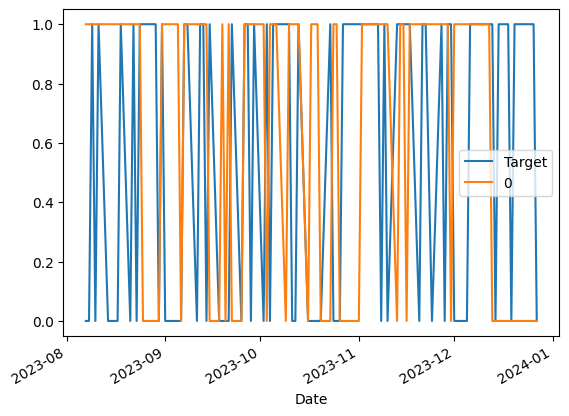

In [90]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [91]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [92]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [93]:
predictions = backtest(sp500, model, predictors)

In [94]:
predictions["Predictions"].value_counts()

0    3316
1    2747
Name: Predictions, dtype: int64

In [95]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5293046960320349

In [84]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534554
0    0.465446
Name: Target, dtype: float64

In [73]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

/var/folders/8y/vhzg0s2d7sscd6qtvsfm6yzc0000gn/T/ipykernel_65454/10987703.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_averages = sp500.rolling(horizon).mean()
/var/folders/8y/vhzg0s2d7sscd6qtvsfm6yzc0000gn/T/ipykernel_65454/10987703.py:11: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
/var/folders/8y/vhzg0s2d7sscd6qtvsfm6yzc0000gn/T/ipykernel_65454/10987703.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before c

In [20]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [21]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,4502.879883,1,1.009447,1.0,1.019312,3.0,1.031997,32.0,1.071098,126.0,1.145022,528.0
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234,1,1.000798,2.0,1.015410,3.0,1.033189,33.0,1.072253,127.0,1.146451,528.0
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020,1,1.000595,2.0,1.009295,4.0,1.034133,33.0,1.072955,128.0,1.147416,528.0


In [22]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [24]:
predictions = backtest(sp500, model, new_predictors)

In [25]:
predictions["Predictions"].value_counts()

0.0    4212
1.0     826
Name: Predictions, dtype: int64

In [26]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5714285714285714

In [27]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.543668
0    0.456332
Name: Target, dtype: float64

In [28]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-11-14 00:00:00-05:00,1,0.0
2023-11-15 00:00:00-05:00,1,1.0
2023-11-16 00:00:00-05:00,1,0.0
